<a href="https://colab.research.google.com/github/rhiannons28/kmc/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [ ]:
! git clone https://www.github.com/DS3001/kmc

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [122]:
#Question 1 pt. 1
air = pd.read_csv('https://raw.githubusercontent.com/rhiannons28/kmc/main/data/airbnb_hw.csv', low_memory=False)
print(air.shape, '\n')
air.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [123]:
air['Price'].describe() #object type
air['Beds'].describe() #Float type
air['Number Of Reviews'].describe() #Float type
air['Review Scores Rating'].describe() #Float type

count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [124]:
#Cleaning Price Variable
air['Price'].value_counts() #Integer, 511 entries
air['Price'] = pd.to_numeric(air['Price'], errors = 'coerce') #Changing to floats, and errors to NaN's
air['Price'].describe() #Float type

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

In [126]:
#Cleaning Beds Variable
#air['Beds'].isna().sum() #85 NA values
air['Beds'] = air['Beds'].fillna(1) #Filling na values with 1's
air['Beds'].isna().sum() #Confirming there are no NA values
air['Beds'].describe()

count    30478.000000
mean         1.528611
std          1.014327
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

In [127]:
#Cleaning Number of Reviews
air['Number Of Reviews'].isna().sum() #0 na values
#This variable seems pretty clean

0

In [128]:
#Cleaning Review Scores Rating
air['Review Scores Rating'].isna().sum() #8323 NA values
pd.crosstab(air['Review Scores Rating'].isnull(), air['Number Of Reviews']>0)
#Combo between True and False

Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


In [129]:
#Putting Cleaned Vars into a Dataframe
air1 = air.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
print(air1.shape)
air1.describe()

(30478, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
count,30297.000000,30478.000000,30478.000000,22155.000000
mean,153.357032,1.528611,12.018735,91.993230
std,108.895698,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,192.000000,2.000000,13.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [130]:
#Question 1 pt. 2
#Dropping NA's to move onto KMeans Clustering
air1 = air1.dropna()
air1.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,150.827814,1.548860,16.521127,91.986699
std,100.263647,1.012773,24.327880,8.847351
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,3.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [131]:
#Maxmin Normalize the Data
def maxmin(x):
  r = (x-min(x))/max(x)-min(x)
  return r

S = air1.drop('Price', axis=1)
S = S.apply(maxmin)

In [132]:
#Question 1 pt. 3
#Clustering the Data
cluster = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
cluster = cluster.fit(S)
S['cluster'] = cluster.labels_
S.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,0.096804,-0.939607,-19.280133,3.378076
std,0.063298,0.094661,0.088474,1.347966
min,0.000000,-1.000000,-20.000000,0.000000
25%,0.062500,-0.992218,-19.310000,3.000000
50%,0.062500,-0.976654,-19.260000,4.000000
75%,0.125000,-0.926070,-19.200000,4.000000
max,1.000000,-0.003891,-19.200000,5.000000


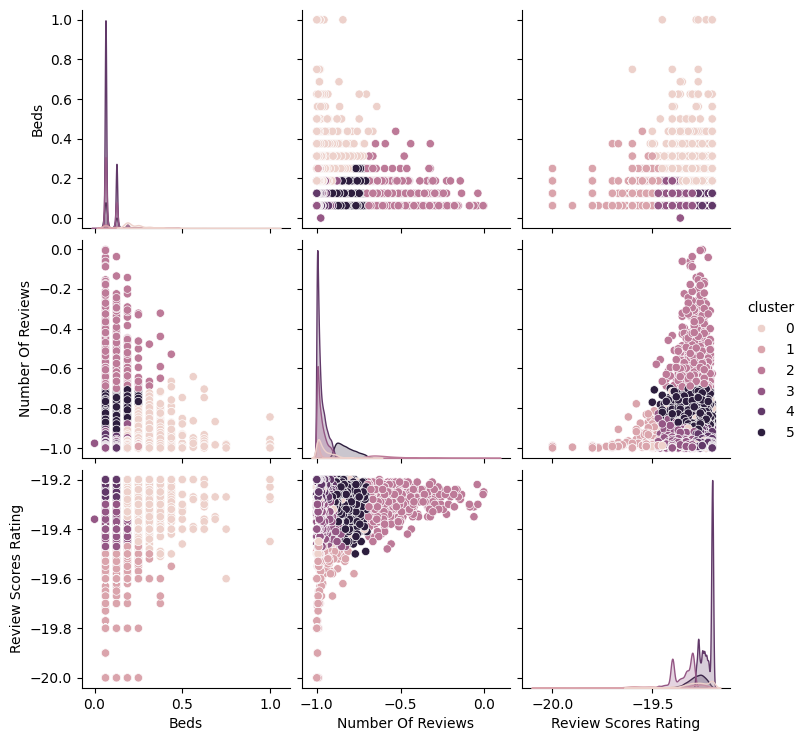

In [133]:
#Question 1 pt. 4
#Grid of Scatterplots
sns.pairplot(data=S, hue='cluster')

In [134]:
#Question 1 pt. 5
air1['cluster'] = cluster.labels_
air1.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                          
           count        mean         std   min    25%    50%    75%    max
cluster                                                                   
0         1951.0  266.015889  165.115665  26.0  150.0  225.0  350.0  997.0
1          665.0  127.699248   96.844023  25.0   65.0   99.0  155.0  799.0
2          763.0  132.847969   83.207015  27.0   80.0  110.0  165.0  875.0
3         5440.0  129.565993   76.243150  20.0   75.0  110.0  165.0  999.0
4        10267.0  145.930359   86.193336  10.0   85.0  128.0  185.0  985.0
5         3018.0  140.991385   81.740756  22.0   86.0  125.0  175.0  895.0

Cluster 0 has the highest rental price of around 267 dollars a night which is significantly higher than the rest of the clusters which are all below 150 dollars a night.

Text(0.5, 1.0, 'Scree Plot')

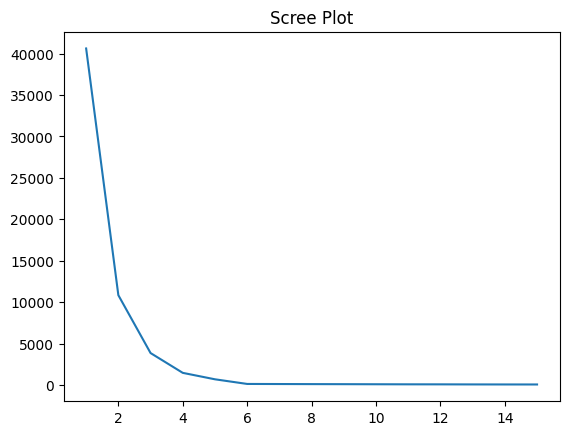

In [137]:
#Question 1 pt. 6
#Scree Plot
kbar = 15
kgrid = np.arange(1, kbar+1) #Range
SSE = np.zeros(kbar) #Training Error
for k in range(kbar):
  cluster = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  cluster = cluster.fit(S)
  SSE[k] = cluster.inertia_

sns.lineplot(x=kgrid, y=SSE).set_title('Scree Plot')

Price                                                          
           count        mean         std   min    25%    50%    75%    max
cluster                                                                   
0        13285.0  144.808355   85.224361  10.0   85.0  125.0  180.0  985.0
1         6203.0  129.969692   77.134099  20.0   75.0  110.0  165.0  999.0
2         2616.0  230.855122  162.295958  25.0  115.0  195.0  300.0  997.0

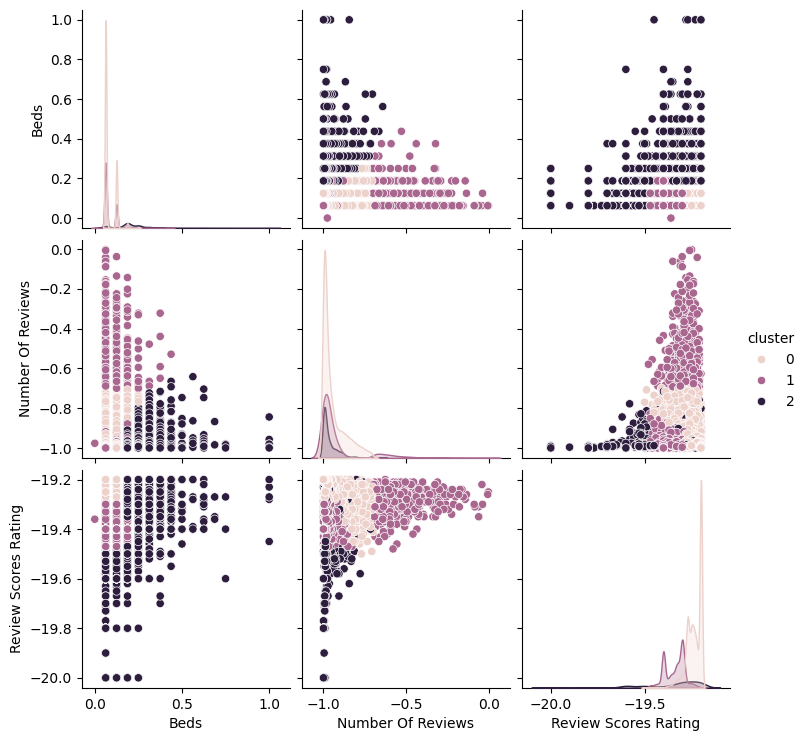

In [141]:
#Model with k=3
cluster = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
cluster = cluster.fit(S)
S['cluster'] = cluster.labels_

sns.pairplot(data=S, hue='cluster')

air1['cluster'] = cluster.labels_
air1.loc[:,['Price', 'cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [150]:
#Question 2 pt. 1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

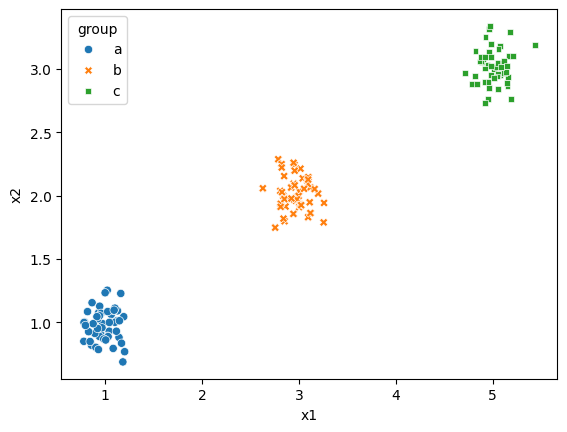

In [151]:
#Question 2 pt. 2
#0.125 dataset
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

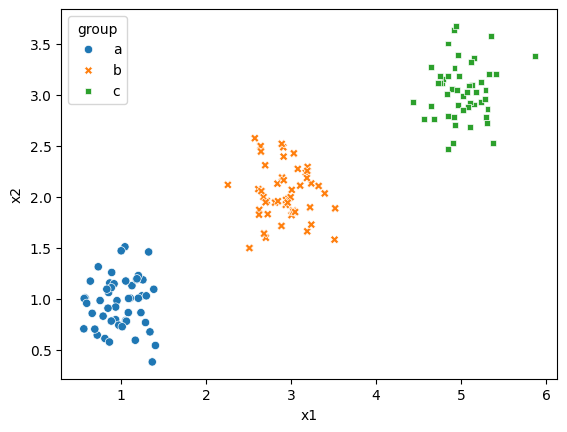

In [152]:
#0.25 Dataset
sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

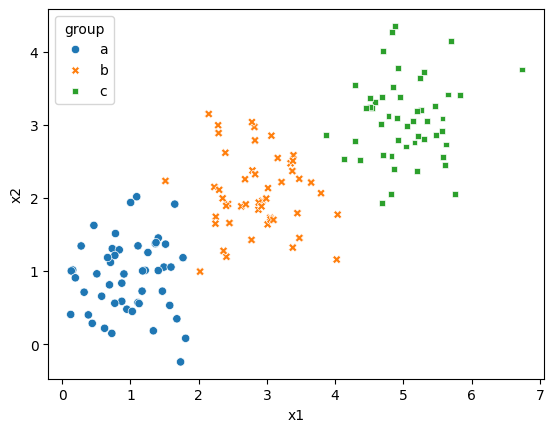

In [153]:
#0.5 Dataset
sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

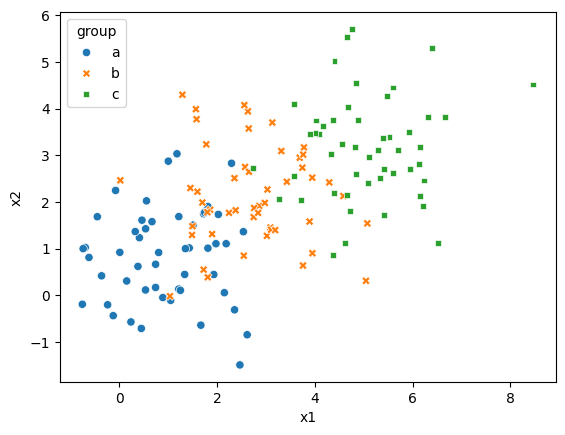

In [154]:
#1.0 Dataset
sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

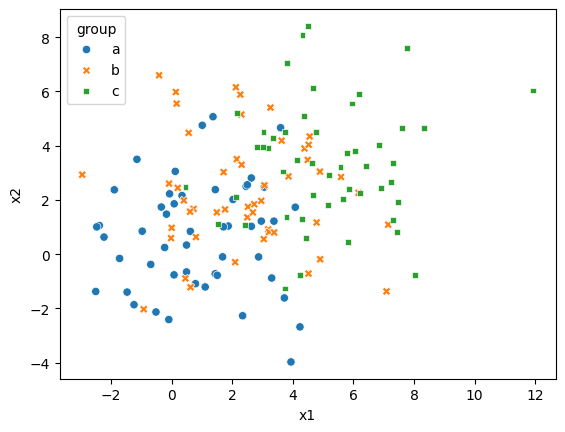

In [156]:
#2.0 Dataset
sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group', style='group')

As the noise in the dataset goes up the clusters go from very far apart, to spread out and integrated.

In [163]:
#Question 2 pt. 3
def maxmin(r): #Max-min
  r = (r-min(r))/(max(r)-min(r))
  return r

In [167]:
#Changed my code to match the function in solutions
def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    kbar = 15
    kgrid = np.arange(1, kbar+1) #Range
    SSE = np.zeros(kbar) #Training Error
    for k in range(kbar):
      cluster = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
      cluster = cluster.fit(X)
      SSE[k] = cluster.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=kgrid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0,35)

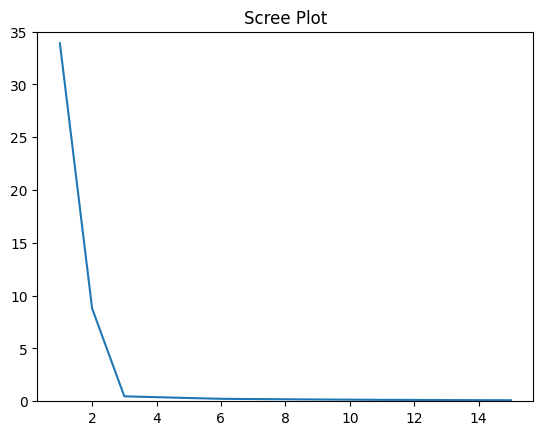

In [168]:
#Scree Plot for 0.125
scree(df0_125)
#There appears to be an elbow at k=3

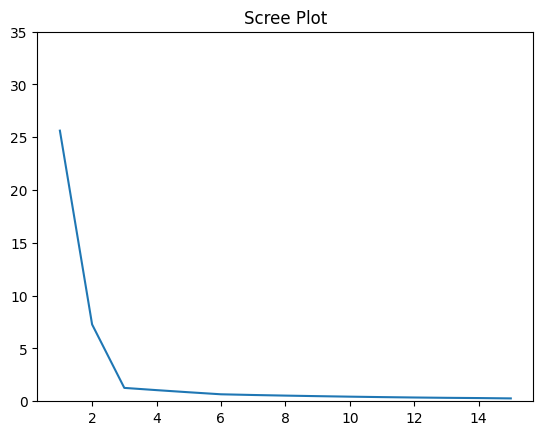

In [169]:
#Scree Plot for 0.25
scree(df0_25)
#There appears to be an elbow at k=3

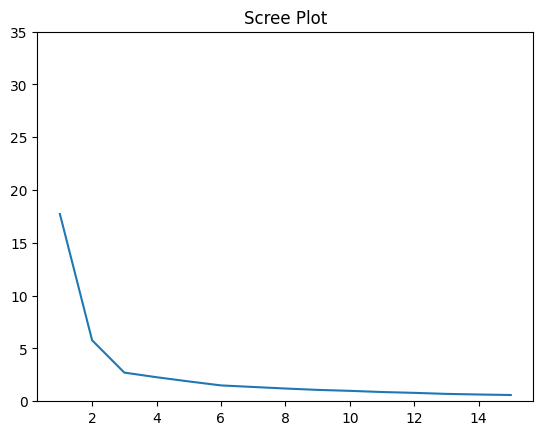

In [170]:
#Scree Plot for 0.5
scree(df0_5)
#There appears to be an elbow at k=3

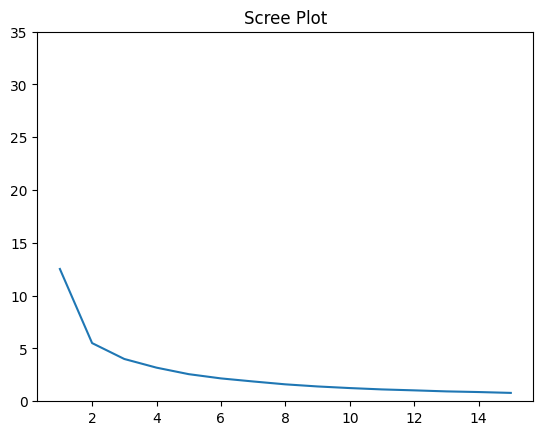

In [171]:
#Scree Plot for 1.0
scree(df1_0)
#There appears to be a slight elbow at k=2

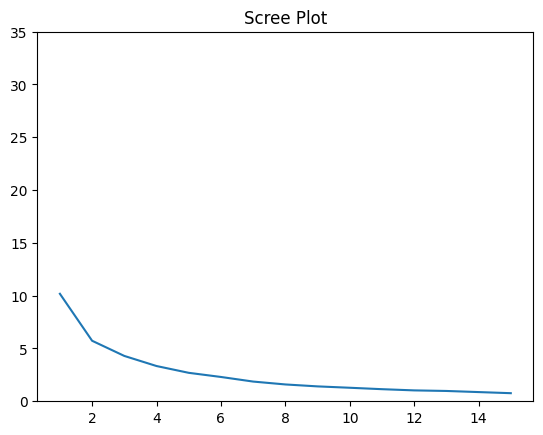

In [172]:
#Scree Plot for 2.0
scree(df2_0)
#There does not seem to be an elbow for this plot

It appears that as noise increases, it becomes more difficult to identify an elbow (a k) in the scree plots.

**Question 2 pt. 4**

It appears that when the clusters are more distinct, it is easier to identify a clear elbow (or k) in the scree plot, and vice versa.

This likely means that a scree plot is more useful when the clusters are separated, and less useful when the clusters are integrated.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?